In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd

df = pd.read_csv('data/SMS.tsv', sep='\t', header=0)
target = df['class']
df = df.drop('class', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def plot_words(words_arr, importance_arr):
    pd.Series(
        importance_arr.ravel(), index=words_arr
    ).plot.barh(color=['cyan', 'green'], figsize=(7, 7))
    plt.xlabel('Feature importance')
    plt.show()

count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(df.text)
vocabulary = count_vectorizer.vocabulary_

vocabulary

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

## Встроенный метод

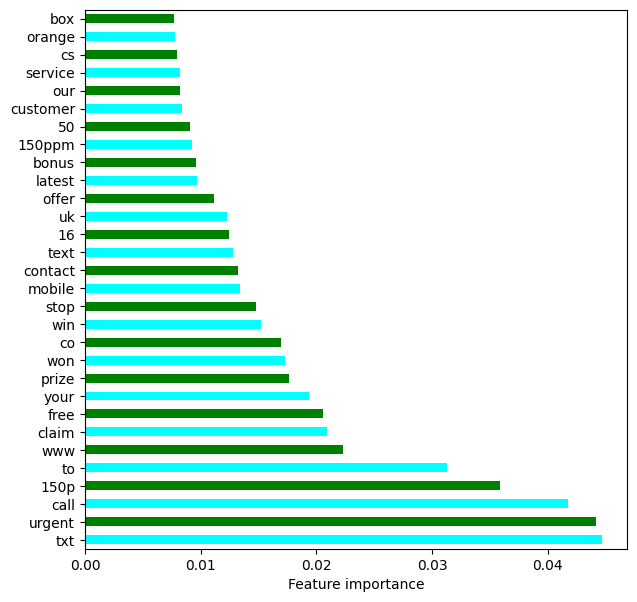

In [3]:
from EmbeddedSelector import EmbeddedSelector
from sklearn.ensemble import RandomForestClassifier

selector = EmbeddedSelector(
    RandomForestClassifier(max_depth=5),
    min_features=30
)

selected = selector.fit_transform(count_vector, target)

words, importance = selector.get_words(vocabulary, return_importance=True)

plot_words(words, importance)

In [4]:
# all features

score = cross_val_score(
    RandomForestClassifier(max_depth=5), count_vector, target
)
score.mean()

0.866834338343625

In [5]:
# selected features

score = cross_val_score(
    RandomForestClassifier(max_depth=5), selected, target
)
score.mean()

0.9380813293508627

## Метод-обертка

estimated first 0 features
estimated first 100 features
estimated first 200 features
estimated first 300 features
estimated first 400 features
estimated first 500 features
estimated first 600 features
estimated first 700 features
estimated first 800 features
estimated first 900 features
estimated first 1000 features
estimated first 1100 features
estimated first 1200 features
estimated first 1300 features
estimated first 1400 features
estimated first 1500 features
estimated first 1600 features
estimated first 1700 features
estimated first 1800 features
estimated first 1900 features
estimated first 2000 features
estimated first 2100 features
estimated first 2200 features
estimated first 2300 features
estimated first 2400 features
estimated first 2500 features
estimated first 2600 features
estimated first 2700 features
estimated first 2800 features
estimated first 2900 features
estimated first 3000 features
estimated first 3100 features
estimated first 3200 features
estimated first 3300 f

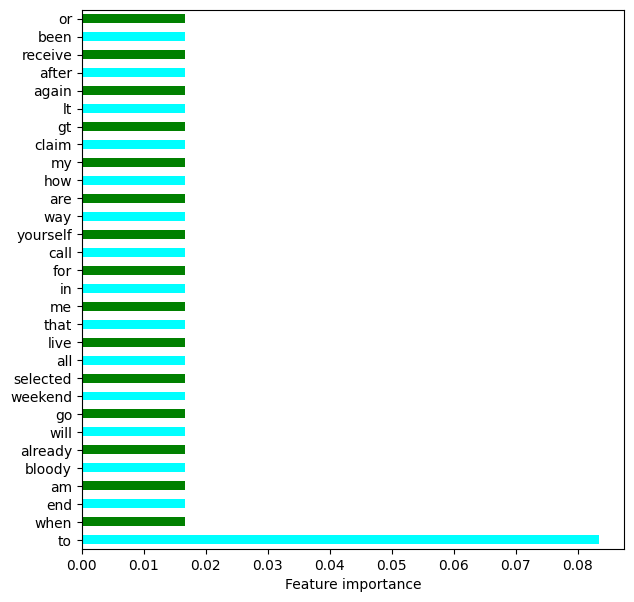

In [8]:
from WrapperSelector import WrapperSelector
from sklearn.linear_model import RidgeClassifier

selector = WrapperSelector(
    RidgeClassifier(),
    min_features=30,
    n_shuffles=10
)

selected = selector.fit_transform(count_vector[:200], target[:200])

words, importance = selector.get_words(vocabulary, return_importance=True)

plot_words(words, importance)

In [9]:
score = cross_val_score(
    RidgeClassifier(), count_vector[:200], target[:200]
)
score.mean()

0.9199999999999999

In [10]:
score = cross_val_score(
    RidgeClassifier(), selected, target[:200]
)
score.mean()

0.905

## Фильтр

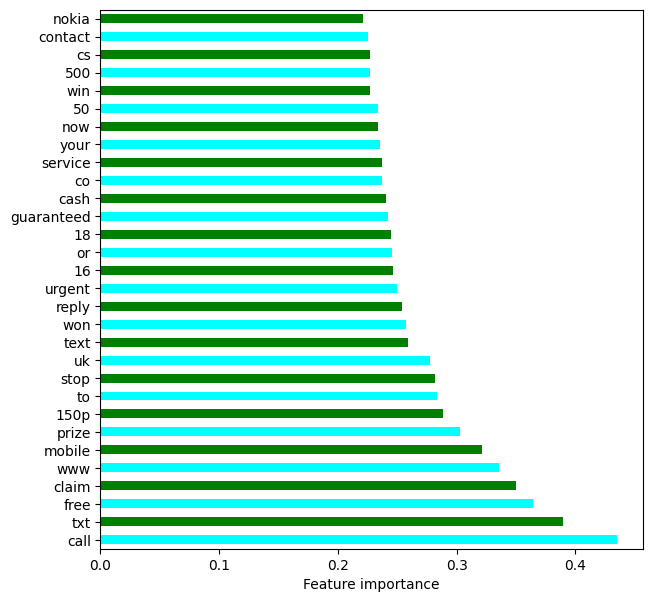

In [3]:
from FilterSelector import FilterSelector
from sklearn.neighbors import KNeighborsClassifier

selector = FilterSelector(min_features=30)

selected = selector.fit_transform(count_vector, target)

words, importance = selector.get_words(vocabulary, return_importance=True)

plot_words(words, importance)

In [4]:
score = cross_val_score(
    KNeighborsClassifier(n_neighbors=10), count_vector, target
)
score.mean()

0.8917796330437723

In [5]:
score = cross_val_score(
    KNeighborsClassifier(n_neighbors=10), selected, target
)
score.mean()

0.9282131212211479

## Библиотечные методы

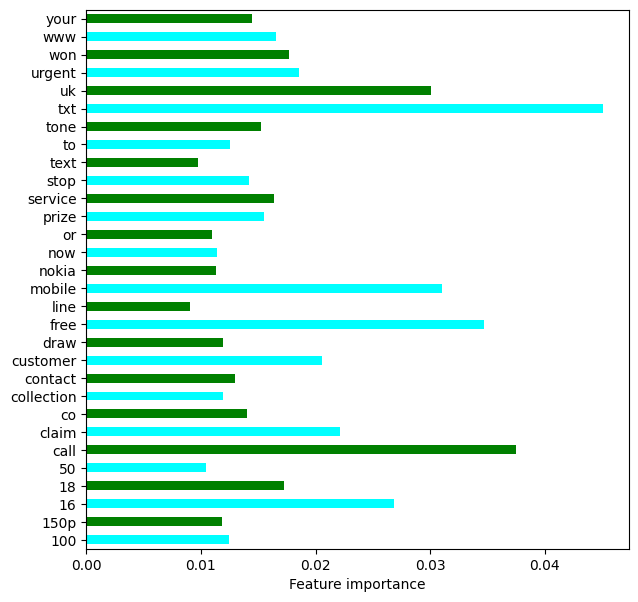

In [14]:
import numpy as np
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(
    estimator=RandomForestClassifier(max_depth=5),
    max_features=30
)

selected = selector.fit_transform(count_vector, target)

inv_vocabulary = {v: k for k, v in vocabulary.items()}
features = selector.get_support(indices=True)
words = []
importance = []
for i in features:
    words.append(inv_vocabulary[i])
    importance.append(selector.estimator_.feature_importances_[i])

plot_words(np.array(words), np.array(importance))

In [15]:
score = cross_val_score(
    RandomForestClassifier(max_depth=5), count_vector, target
)
score.mean()

0.8670135495245994

In [16]:
score = cross_val_score(
    RandomForestClassifier(max_depth=5), selected, target
)
score.mean()

0.941850560739387

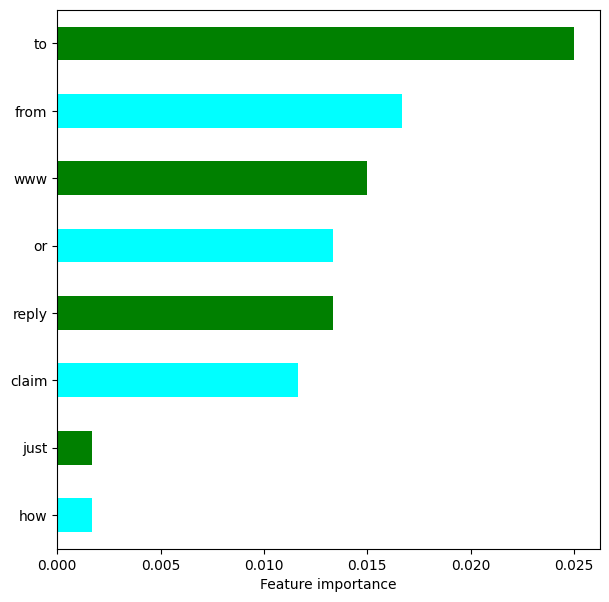

In [17]:
from sklearn.inspection import permutation_importance

X_train, X_valid, y_train, y_valid = train_test_split(count_vector.toarray()[:200], target[:200], train_size=0.7)

estimator = RidgeClassifier().fit(X_train, y_train)

result = permutation_importance(estimator, X_valid, y_valid, n_repeats=10)
features = np.argsort(result.importances_mean)[-30:]
features = np.array(list(filter(
    lambda x: result.importances_mean[x] != 0,
    features
)))
words = []
importance = []
for i in features:
    words.append(inv_vocabulary[i])
    importance.append(result.importances_mean[i])

plot_words(np.array(words), np.array(importance))

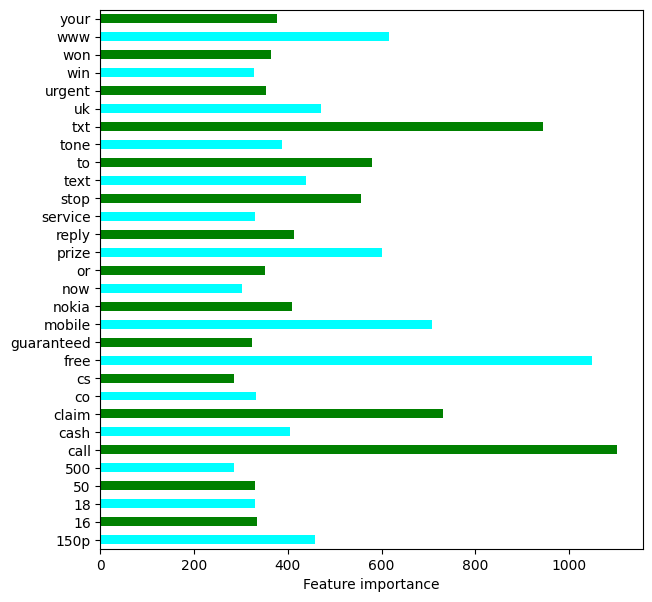

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=30)

selected = selector.fit_transform(count_vector, target)

features = selector.get_support(indices=True)
words = []
importance = []
for i in features:
    words.append(inv_vocabulary[i])
    importance.append(selector.scores_[i])

plot_words(np.array(words), np.array(importance))

In [19]:
score = cross_val_score(
    RidgeClassifier(), count_vector, target
)
score.mean()

0.9779248214731385

In [20]:
score = cross_val_score(
    RidgeClassifier(), selected, target
)
score.mean()

0.9553110433053433